# Credit Risk Evaluator

In [6]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Retrieving the Data


In [34]:
# Importing the data
df = pd.read_csv("Resources/lending_data.csv")
df.head()



,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


## Predicting Model Performance



*Either of the random forest or logistic regression models perform similarly across datasets with performance more influenced by choice of dataset rather than model selection.*

In [3]:
df.dtypes

loan_size           float64
interest_rate       float64
borrower_income       int64
debt_to_income      float64
num_of_accounts       int64
derogatory_marks      int64
total_debt            int64
loan_status           int64
dtype: object

In [4]:
df.isnull().sum()

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

In [5]:
#There are no missing values, so there is no need to clean the data

C:\Users\patri\AppData\Local\Temp\ipykernel_11640\902902639.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


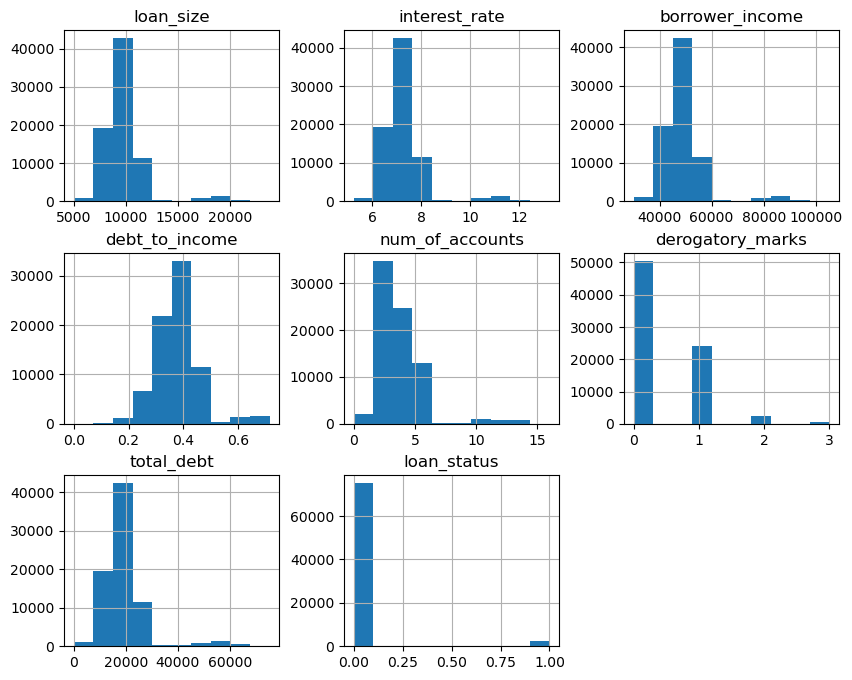

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
df.hist(ax=ax)
plt.show()

## Splitting the Data into Training and Testing Sets

In [35]:
# Defining the X (features) and y (target) sets
y = df["loan_status"].values
X = df.drop("loan_status", axis = 1)

In [10]:
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [11]:
np.unique(y)

array([0, 1], dtype=int64)

In [36]:
# Splitting the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


## Creating, Fitting and Comparing Models



## Logistic Regression Model

In [13]:
# Training a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 1000)
classifier

LogisticRegression(max_iter=1000)

In [14]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
print("train data score: ", classifier.score(X_train, y_train))
print("test data score: ", classifier.score(X_test, y_test))

train data score:  0.9919177328380795
test data score:  0.9924680148576145


In [16]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

In [17]:
y_true = y_test
y_pred = classifier.predict(X_test)

In [18]:
cm = confusion_matrix(y_true,y_pred)
cm

array([[18699,    93],
       [   53,   539]], dtype=int64)

In [19]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18792
           1       0.85      0.91      0.88       592

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [20]:
tn, fp, fn, tp = cm.ravel()

In [30]:
print(f"True positives (TP): {tp}")
print(f"True negatives (TN): {tn}")
print(f"False positives (FP): {fp}")
print(f"False negatives (FN): {fn}")

True positives (TP): 539
True negatives (TN): 18699
False positives (FP): 93
False negatives (FN): 53


In [31]:
# Calculating the precision of the model based on the confusion matrix

precision = tp/ (tp + fp)
precision

0.8528481012658228

In [32]:
# Calculating the sensitivity of the model based on the confusion matrix

sensitivity = tp / (tp + fn)
sensitivity

0.910472972972973

In [33]:
# Calculating the F1 score of the model based on the confusion matrix

f1 = 2* precision * sensitivity/ (precision + sensitivity)
f1

0.880718954248366

## Random Forest Classifier model

In [42]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [43]:
# Preparing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Training a Random Forest Classifier model and printing the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


In [45]:
feature_importances = clf.feature_importances_

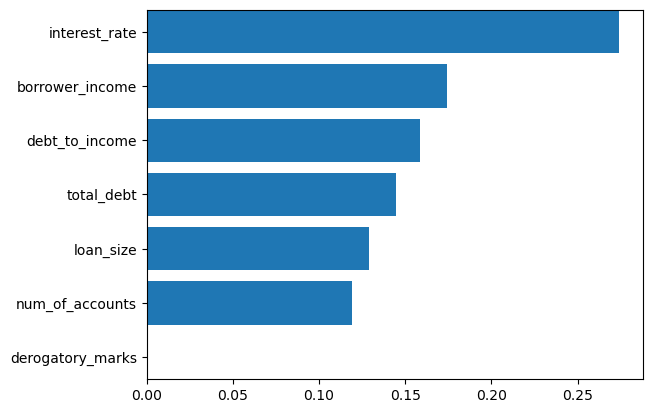

In [49]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()


plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [50]:
from sklearn.feature_selection import SelectFromModel

In [52]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False,  True])

In [53]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\patri\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [54]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [55]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


# Analysis

Although there isn't a significant difference between both models, the Random Forest Classifier performed better than the Regression Model.
